In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

#Import textfiles
gainFile = "Gain_Zenith_PVA.txt"
phaseFile = "Phase_Zenith_PVA.txt"
unwrappedPhaseFile = "Unwrapped_Phase_Zenith_PVA.txt"

gainData = np.genfromtxt(gainFile,skip_header=1, dtype=None, delimiter=',')
phaseData = np.genfromtxt(phaseFile,skip_header=1, dtype=None, delimiter=',')
unwrappedPhaseData = np.genfromtxt(unwrappedPhaseFile,skip_header=1, dtype=None, delimiter=',')

In [2]:
#Create initial arrays for frequency, zenith, and azimuth (which we have symmetry, but it's good to write anyways)
inputZenith = gainData[:,0] #Mohammad's data goes from zero to 360 since he rotated the whole antenna on a table.
inputAzimuth = np.arange(0,361) #We have azimuthal symmetry in the PVA and ARA antennas, but we keep this format due to how XF outputs things and if we want to simulate non-azimuthally symmetric antennas.
inputFreq = np.arange(50,1050,50) #Mohammad measured every 50 MHz, which I'll need to interpolate to what we have in the AraSim data for antennas.

#Truncate first column form gain and phase data as it contains the zenith angles
gain = gainData[:,1:]
phase = phaseData[:,1:]
unwrappedPhase = unwrappedPhaseData[:,1:]

Text(0, 0.5, 'Gain [dB]')

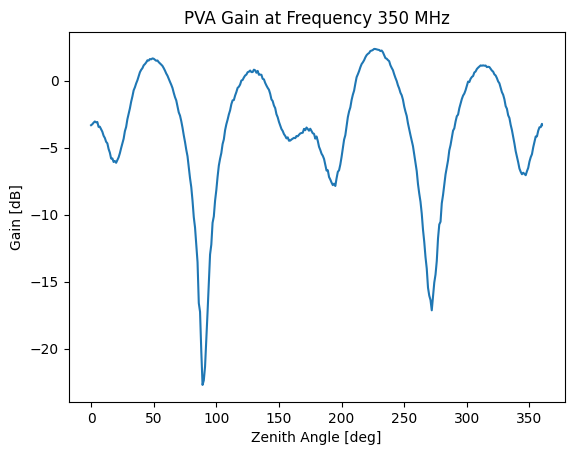

In [3]:
index = 6
plt.plot(inputZenith, gain[:,index])
plt.title("PVA Gain at Frequency " + str(inputFreq[index]) + " MHz")
plt.xlabel("Zenith Angle [deg]")
plt.ylabel("Gain [dB]")

Text(0, 0.5, 'Gain [db]')

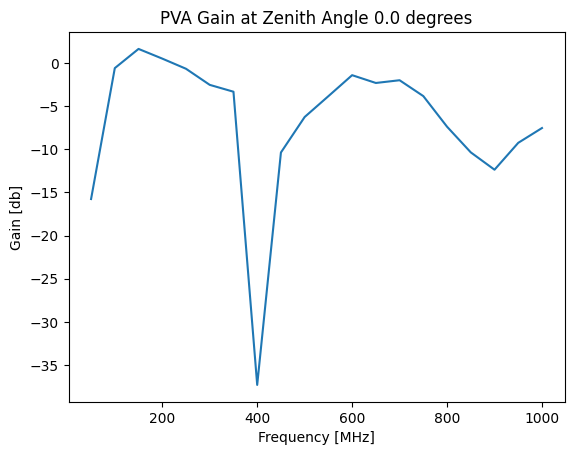

In [4]:
index = 0
plt.plot(inputFreq, gain[index,:])
plt.title("PVA Gain at Zenith Angle " + str(inputZenith[index]) + " degrees")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Gain [db]")

In [5]:
gainData[:,:].shape

(362, 21)

In [6]:
#Create arrays for interpolation into the XF format
outputZenith = np.arange(0,185,5)
outputAzimuth = np.arange(0,360,5)
outputFreq = 1/6*np.arange(500,6500,100) #XF stores frequency in intervals of 100/6 for some reason.

In [7]:
# Check content and size of output arays
print("outputZenith array: ")
print(outputZenith)
print("\noutputZenith size: ")
print(outputZenith.size)

print("\noutputAzimuth array: ")
print(outputAzimuth)
print("\noutputAzimuth size: ")
print(outputAzimuth.size)

print("\noutputFreq array: ")
print(outputFreq)
print("\noutputFreq size: ")
print(outputFreq.size)

outputZenith array: 
[  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175
 180]

outputZenith size: 
37

outputAzimuth array: 
[  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175
 180 185 190 195 200 205 210 215 220 225 230 235 240 245 250 255 260 265
 270 275 280 285 290 295 300 305 310 315 320 325 330 335 340 345 350 355]

outputAzimuth size: 
72

outputFreq array: 
[  83.33333333  100.          116.66666667  133.33333333  150.
  166.66666667  183.33333333  200.          216.66666667  233.33333333
  250.          266.66666667  283.33333333  300.          316.66666667
  333.33333333  350.          366.66666667  383.33333333  400.
  416.66666667  433.33333333  450.          466.66666667  483.33333333
  500.          516.66666667  533.33333333  550.          566.66666667
  583.33333333  600.          61

In [8]:
# Check content (, shape) and size of input arrays
print("inputFreq array: ")
print(inputFreq)
print("\ninputFreq shape: ")
print(inputFreq.shape)
print("\ninputFreq size: ")
print(inputFreq.size)

print("\ngain array: ")
print(gain)
print("\ngain shape: ")
print(gain.shape)

inputFreq array: 
[  50  100  150  200  250  300  350  400  450  500  550  600  650  700
  750  800  850  900  950 1000]

inputFreq shape: 
(20,)

inputFreq size: 
20

gain array: 
[[-15.76283  -0.58158   1.64538 ... -12.36201  -9.24459  -7.52848]
 [-15.76353  -0.50518   1.65878 ... -14.33131  -9.00819  -9.24048]
 [-15.90473  -0.54848   1.60898 ... -13.35451  -9.06969  -7.03518]
 ...
 [-17.79473  -0.50588   1.65168 ... -11.75151  -9.40289  -7.80698]
 [-17.46473  -0.54708   1.71648 ... -14.48181  -8.49779  -7.68448]
 [-15.76283  -0.58158   1.64538 ... -12.36201  -9.24459  -7.52848]]

gain shape: 
(362, 20)


## Let me try to interpolate the gain first

In [9]:
# Concatenate gain columns for interpolation
gain_flatten = gain.flatten()

# Check new gain "flattened"
print("\ngain_flatten shape: ")
print(gain_flatten.shape)
print("\ngain_flatten array: ")
print(gain_flatten)

print("\ngain_flatten elements corresponding to gain second column: ")
print(gain_flatten[20:40])
print("\ngain_flatten elements corresponding to gain second-to-last column: ")
print(gain_flatten[-40:-20])

print("\nOkay, fine. They match!")


gain_flatten shape: 
(7240,)

gain_flatten array: 
[-15.76283  -0.58158   1.64538 ... -12.36201  -9.24459  -7.52848]

gain_flatten elements corresponding to gain second column: 
[-15.76353  -0.50518   1.65878   0.55947  -0.59393  -2.44137  -3.2457
 -30.56568 -10.25321  -6.02393  -4.30675  -1.28357  -2.3555   -1.60325
  -3.45797  -7.60828 -11.15889 -14.33131  -9.00819  -9.24048]

gain_flatten elements corresponding to gain second-to-last column: 
[-17.46473  -0.54708   1.71648   0.47197  -0.28153  -3.08997  -3.2159
 -28.60878 -10.50401  -5.74383  -4.15515  -1.23457  -2.3151   -1.68945
  -3.50977  -7.20308 -12.39949 -14.48181  -8.49779  -7.68448]

Okay, fine. They match!


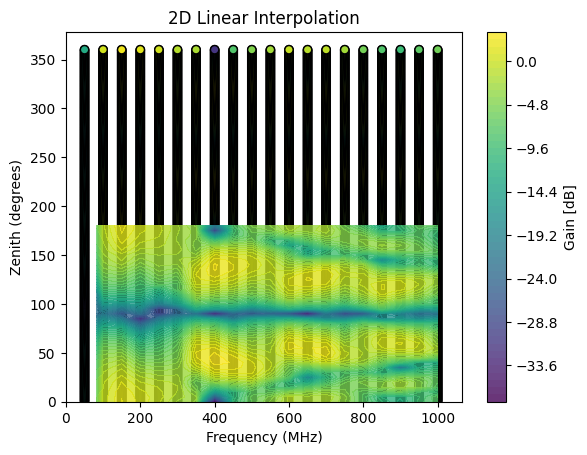

The black lines are dense regions of data points (hopefully). The colored region is the surface of interpolated gains. 


In [12]:
# Create a grid for interpolation
outputFreq, outputZenith = np.meshgrid(outputFreq, outputZenith)

# 2D linear interpolation
outputGain = griddata((np.tile(inputFreq, len(inputZenith)), np.repeat(inputZenith, len(inputFreq))), gain_flatten, (outputFreq, outputZenith), method='linear', fill_value=np.nan)

# Plot the original data points
plt.scatter(np.tile(inputFreq, len(inputZenith)), np.repeat(inputZenith, len(inputFreq)), c=gain_flatten, marker='o', edgecolors='k', cmap='viridis', label='Data Points')

# Plot the interpolated surface
plt.contourf(outputFreq, outputZenith, outputGain, cmap='viridis', alpha=0.8, levels=50)

# Add colorbar
plt.colorbar(label='Gain [dB]')

# Set labels and title
plt.xlabel('Frequency (MHz)')
plt.ylabel('Zenith (degrees)')
plt.title('2D Linear Interpolation')

# Show the plot
plt.show()

print("The black lines are dense regions of data points (hopefully). \
The colored region is the surface of interpolated gains. ")

In [13]:
# Check outputGain array

print("outputGain array: ")
print(outputGain)
print("\noutputGain shape: ")
print(outputGain.shape)
print("Good. 37 zenith angles and 60 frequencies!")
print("\noutputGain first column: ")
print(outputGain[0,:])

outputGain array: 
[[-5.64199667 -0.58158     0.16074    ...         nan         nan
          nan]
 [-5.64873    -0.53198     0.16917333 ...         nan         nan
          nan]
 [-5.75026333 -0.59308     0.08770667 ...         nan         nan
          nan]
 ...
 [-6.66033    -1.31058    -0.37849333 ...         nan         nan
          nan]
 [-6.51983    -1.10878    -0.16356    ...         nan         nan
          nan]
 [-6.29266333 -1.00008    -0.02472667 ...         nan         nan
          nan]]

outputGain shape: 
(37, 60)
Good. 37 zenith angles and 60 frequencies!

outputGain first column: 
[ -5.64199667  -0.58158      0.16074      0.90306      1.64538
   1.27074333   0.89610667   0.52147      0.12890333  -0.26366333
  -0.65623     -1.27824333  -1.90025667  -2.52227     -2.78721333
  -3.05215667  -3.3171     -14.65086    -25.98462    -37.31838
 -28.33412333 -19.34986667 -10.36561     -8.99351667  -7.62142333
  -6.24933     -5.44393667  -4.63854333  -3.83315     -3.02179
  -

In [14]:
# Get rid of stupid nans by using the last non-nan value
def replace_nan_with_last_non_nan(arr):
    result = arr.copy()
    for i in range(result.shape[0]):
        last_non_nan_value = np.nan
        for j in range(result.shape[1]):
            if not np.isnan(result[i, j]):
                last_non_nan_value = result[i, j]
            else:
                result[i, j] = last_non_nan_value
    return result

outputGain_nonnan=replace_nan_with_last_non_nan(outputGain)
print("outputGain_nonnan first column: ")
print(outputGain_nonnan[0,:])

print("\nI think that's how interpolation would be done \
in AraSim for frequencies out of data boundaries.")

outputGain_nonnan first column: 
[ -5.64199667  -0.58158      0.16074      0.90306      1.64538
   1.27074333   0.89610667   0.52147      0.12890333  -0.26366333
  -0.65623     -1.27824333  -1.90025667  -2.52227     -2.78721333
  -3.05215667  -3.3171     -14.65086    -25.98462    -37.31838
 -28.33412333 -19.34986667 -10.36561     -8.99351667  -7.62142333
  -6.24933     -5.44393667  -4.63854333  -3.83315     -3.02179
  -2.21043     -1.39907     -1.70048     -2.00189     -2.3033
  -2.19751667  -2.09173333  -1.98595     -2.59932333  -3.21269667
  -3.82607     -5.00924     -6.19241     -7.37558     -8.36741667
  -9.35925333 -10.35109    -11.02139667 -11.69170333 -12.36201
 -11.32287    -10.28373     -9.24459     -8.67255333  -8.10051667
  -7.52848     -7.52848     -7.52848     -7.52848     -7.52848   ]

I think that's how interpolation would be done in AraSim for frequencies out of data boundaries.


In [15]:
# Testing the interpolator
x1, y1, z1 = 0, 50, -15.76283
x2, y2, z2 = 0, 100, -0.58158

# Interpolation point
x, y = 0, 83.33

# Linear interpolation formula
z = z1 + ((z2 - z1) * (y - y1)) / (y2 - y1)

print(f"Interpolated z-value for (x, y) = ({x}, {y}): {z}")

print("This is what the gain at 83.33 MHz should be. \
It agrees with the first element of outputGain_nonnan. We could check more.")

Interpolated z-value for (x, y) = (0, 83.33): -5.64300875
This is what the gain at 83.33 MHz should be. It agrees with the first element of outputGain_nonnan. We could check more.


## Now let's interpolate the phase

In [17]:
# Check phase aray

print("\nphase array: ")
print(phase)
print("\nphase shape: ")
print(phase.shape)


phase array: 
[[  92.0165  -56.9947  130.939  ...  -68.578  -127.997   141.135 ]
 [  94.1797  -56.5293  131.034  ...  -73.7589 -129.798   146.661 ]
 [  91.7863  -56.2767  131.493  ...  -58.877  -128.025   149.096 ]
 ...
 [  86.5403  -57.834   132.32   ...  -64.8847 -141.549   141.462 ]
 [  87.9645  -58.281   132.967  ...  -75.6353 -134.31    145.295 ]
 [  92.0165  -56.9947  130.939  ...  -68.578  -127.997   141.135 ]]

phase shape: 
(362, 20)


In [16]:
# Concatenate phase columns for interpolation
phase_flatten = phase.flatten()

# Check new gain "flattened"
print("\nphase_flatten shape: ")
print(phase_flatten.shape)
print("\nphase_flatten array: ")
print(phase_flatten)

print("\nphase_flatten elements corresponding to phase second column: ")
print(phase_flatten[20:40])
print("\nphase_flatten elements corresponding to phase second-to-last column: ")
print(phase_flatten[-40:-20])

print("\nOkay, fine. They match!")


phase_flatten shape: 
(7240,)

phase_flatten array: 
[  92.0165  -56.9947  130.939  ...  -68.578  -127.997   141.135 ]

phase_flatten elements corresponding to phase second column: 
[  94.1797   -56.5293   131.034     15.6348   -90.4288   170.595
   23.4633   -78.5486    -4.93988 -103.532    159.191     57.7425
  -38.6004  -131.238    127.4       26.3915   -35.6456   -73.7589
 -129.798    146.661  ]

phase_flatten elements corresponding to phase second-to-last column: 
[  87.9645  -58.281   132.967    15.6997  -90.1569  166.805    24.9652
  -24.443   -13.2472 -104.539   157.052    57.5257  -38.9852 -130.778
  124.799    25.0835  -45.5209  -75.6353 -134.31    145.295 ]

Okay, fine. They match!


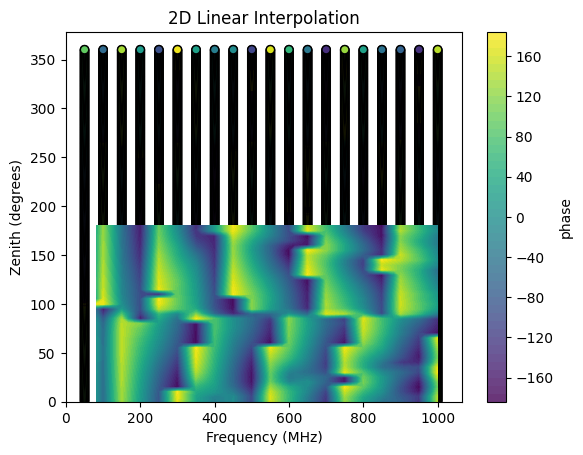

The black lines are dense regions of data points (hopefully). The colored region is the surface of interpolated gains. 


In [19]:
# Create a grid for interpolation
outputFreq_p, outputZenith_p = np.meshgrid(outputFreq, outputZenith)

# 2D linear interpolation
outputPhase = griddata((np.tile(inputFreq, len(inputZenith)), np.repeat(inputZenith, len(inputFreq))), phase_flatten, (outputFreq_p, outputZenith_p), method='linear', fill_value=np.nan)

# Plot the original data points
plt.scatter(np.tile(inputFreq, len(inputZenith)), np.repeat(inputZenith, len(inputFreq)), c=phase_flatten, marker='o', edgecolors='k', cmap='viridis', label='Data Points')

# Plot the interpolated surface
plt.contourf(outputFreq_p, outputZenith_p, outputPhase, cmap='viridis', alpha=0.8, levels=50)

# Add colorbar
plt.colorbar(label='phase')

# Set labels and title
plt.xlabel('Frequency (MHz)')
plt.ylabel('Zenith (degrees)')
plt.title('2D Linear Interpolation')

# Show the plot
plt.show()

print("The black lines are dense regions of data points (hopefully). \
The colored region is the surface of interpolated gains. ")

In [26]:
# Check outputPhase array

print("outputPhase array: ")
print(outputPhase)
print("\noutputPhase shape: ")
print(outputPhase.shape)
print("Good. 37 zenith angles and 60 frequencies!")
print("\noutputPhase first column: ")
print(outputPhase[0,:])
print("\noutputPhase first column's last elements: ")
print(outputPhase[0,-5:-1])

outputPhase array: 
[[ -7.3243     -56.9947       5.64986667 ...          nan          nan
           nan]
 [ -7.3243     -56.9947       5.64986667 ...          nan          nan
           nan]
 [ -7.3243     -56.9947       5.64986667 ...          nan          nan
           nan]
 ...
 [ 49.214      121.457       65.59996667 ...          nan          nan
           nan]
 [ 49.214      121.457       65.59996667 ...          nan          nan
           nan]
 [ 49.214      121.457       65.59996667 ...          nan          nan
           nan]]

outputPhase shape: 
(2220, 2220)
Good. 37 zenith angles and 60 frequencies!

outputPhase first column: 
[ -7.3243     -56.9947       5.64986667 ...          nan          nan
          nan]

outputPhase first column's last elements: 
[141.135     nan     nan     nan]


In [27]:
outputPhase_nonnan=replace_nan_with_last_non_nan(outputPhase)
print("outputPhase_nonnan first column: ")
print(outputPhase_nonnan[0,:])

outputPhase_nonnan first column: 
[ -7.3243     -56.9947       5.64986667 ... 141.135      141.135
 141.135     ]


In [30]:
# Testing the interpolator
x1, y1, z1 = 0, 50,  92.0165  
x2, y2, z2 = 0, 100, -56.9947

# Interpolation point
x, y = 0, 83.33

# Linear interpolation formula
z = z1 + ((z2 - z1) * (y - y1)) / (y2 - y1)

print(f"Interpolated z-value for (x, y) = ({x}, {y}): {z}")

print("This is what the phase at 83.33 MHz should be. \
It agrees with the first element of outputPhase_nonnan. We could check more.")

Interpolated z-value for (x, y) = (0, 83.33): -7.31436592
This is what the phase at 83.33 MHz should be. It agrees with the first element of outputPhase_nonnan. We could check more.
